## Traffic Data: Every 5 min

In [143]:
data_path = "/home/qiyu/data/"
data_set = "climate"
file_name = data_path+data_set+".npy"
import numpy as np
climate = np.load(file_name)
print(climate.shape)


data_set = "traffic"
file_name = data_path+data_set+".npy"
import numpy as np
traffic = np.load(file_name)
print(traffic.shape)

(45384, 54)
(35136, 115)


### plot time series

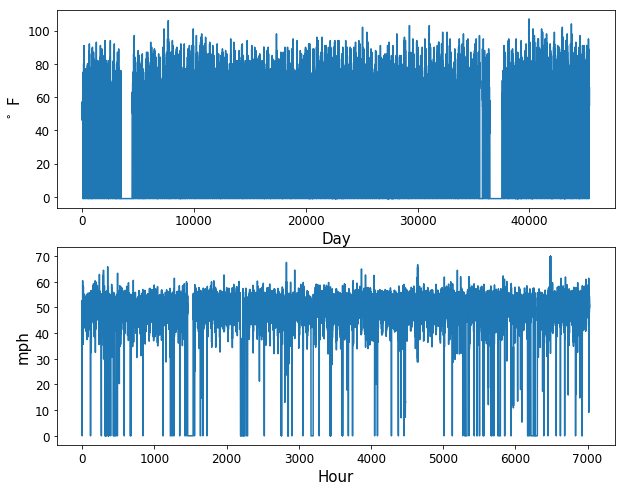

In [159]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

params = {
   'axes.labelsize': 12,
   'font.size': 20,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize':[10,8]
   }
mpl.rcParams.update(params)

f, (ax1, ax2) = plt.subplots(2, sharex=False, sharey=False)

x1 = np.arange(climate.shape[0])
ax1.plot(x1, climate[:,0])
ax1.set_xlabel('Day', fontsize = 15.0)
ax1.set_ylabel('$^\circ$ F', fontsize = 15.0)

x2 = np.arange(traffic.shape[0])/5
ax2.plot(x2, traffic[:,0])
ax2.set_xlabel('Hour', fontsize = 15.0)
ax2.set_ylabel('mph', fontsize = 15.0)


In [ ]:


x = np.arange(0,dat.shape[0])

for i in range(200,210):
    plt.figure()
    plt.plot(x, dat[i,:])
    plt.xlabel('Hour')
    plt.ylabel('mph')

### Fill missing (zero) value 

Use the mean of same time, other days to fill in

In [ ]:
import numpy as np
def fill_zero_daily(x):
    nz_idx = np.nonzero(x)
  
    zero_idx = np.argwhere(x==0)
    if len(nz_idx[0])==0:
         print('all zero')
    else:
        mean_val = np.mean(x[nz_idx])
        x[zero_idx] = mean_val
    return x

def fill_zero(dat):
    n_dim = dat.shape[1]
    dat_reshape = dat.reshape((-1,12*24,n_dim)) # daily traffic

    mat_nz = np.copy(dat_reshape)
    for i in range(mat.shape[1]):
        for j in range(mat.shape[2]):
            mat_nz[:,i,j] = fill_zero_daily(mat_nz[:,i,j])
    return mat_nz

### Subsample the data  20 min for every day

In [ ]:
dat_nz = fill_zero(dat)
n_days = dat_nz.shape[0]
dat_aug = []

def up_sample(x):
    """upsample each day into 72 examples"""
    x_aug = []
    for j in range(24*3):
        x_aug.append(np.roll(x,-j*4, axis=0))
    return np.array(x_aug)
    
for i in range(n_days):
    dat_up = up_sample(dat_nz[i,:,:])
    dat_aug.append(dat_up)
dat_aug = np.concatenate(dat_aug, axis=0)
print(dat_aug.shape)
dat_aug_sub = dat_aug[:,:,:15]
print(dat_aug_sub.shape)
np.save('/home/qiyu/data/traffic_s2s.npy',dat_aug_sub)

### rescale and save

In [ ]:
dat = rescale_ts(dat)

import numpy as np
np.save(data_path+data_set, dat)

In [ ]:
import pandas as pd
df = pd.DataFrame(dat)
df.describe()

### visualize traffic series

In [ ]:
import matplotlib.ticker as ticker

params = {
   'axes.labelsize': 20,
   'text.fontsize': 20,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

data_mat = dat
T = 600
ax.plot(data_mat[:T,1], 'b')
# ax.plot(data_mat[:T,1], 'c')
ax.plot(data_mat[:T,2], 'c')
ax.set_xlabel("Time (minutes)")
ax.set_ylabel("Speed (m/h)")


x = len(data_mat)
tick_spacing = 144
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks([0,144, 288, 432, 576 ], ['00:00','06:00','12:00','18:00', '24:00'])

fig.savefig('traffic.png')

## Climate (TMAX) data: daily

In [160]:
data_path = "/home/qiyu/data/"
data_set = "climate"
file_name = data_path+data_set+".npy"
import numpy as np
dat = np.load(file_name)
print(dat.shape)
print(type(dat))

(45384, 54)
<class 'numpy.ndarray'>


In [161]:
# truncate to 114 years- remove first 10 years
dat_sm = dat[-41610:,:]
print(dat_sm.shape)

(41610, 54)


In [ ]:
# plot the time series: note that first 10 years are missing
x = np.arange(dat_sm.shape[0])
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x[:365], dat_sm[100:465,3],'b')
ax2.plot(x[:365], dat_sm[0:365,5],'g')
ax3.plot(x[:365], dat_sm[0:365,10],'m')
ax3.set_xlabel('Day',fontsize = 18.0)
ax2.set_ylabel('$^\circ$ F', fontsize = 18.0)

In [162]:
# remove the anomalous high values
dat_sm[dat_sm>200]=-1

i: 0 691
i: 1 3666
i: 5 5778
i: 9 21640
i: 37 31070


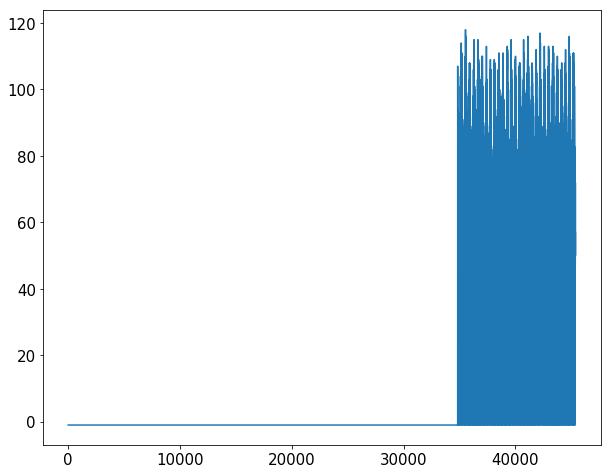

In [133]:
# find the first non-zero day and remove the entries before
# plt.plot(dat[:,i])
idx_max = 0
idx_list =[]
for i in range(dat.shape[1]):
    x = np.argwhere(dat_sm[:,i] > 50)[0]
    idx = x[0]
    idx_list.append(idx)
    if idx > idx_max:
        print('i:',i, idx)
        idx_max = idx
plt.plot(dat[:,37])       

In [168]:
import numpy as np
def fill_missing_daily(x):
    nz_idx = np.nonzero(x+1)
  
    missing_idx = np.argwhere(x==-1)
    if len(nz_idx[0])==0:
         print('all missing')
    else:
        mean_val = np.mean(x[nz_idx])
        x[missing_idx] = mean_val
    return x

def fill_missing(dat_reshape):
    mat_nz = np.copy(dat_reshape)
    for i in range(mat_nz.shape[1]):
        for j in range(mat_nz.shape[2]):
            mat_nz[:,i,j] = fill_missing_daily(mat_nz[:,i,j])
    return mat_nz

n_dim = dat_sm.shape[1]
dat_reshape = dat_sm.reshape((-1,365,n_dim)) # yearly temperature
dat_nz = fill_missing(dat_reshape)
print(dat_nz.shape)

(114, 365, 54)


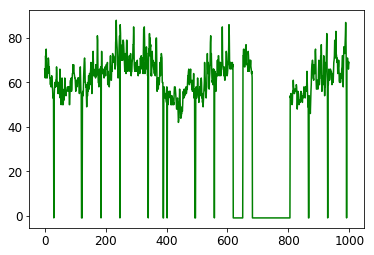

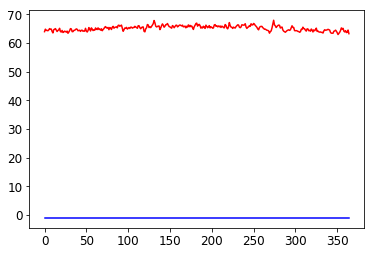

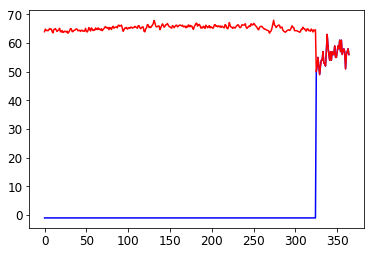

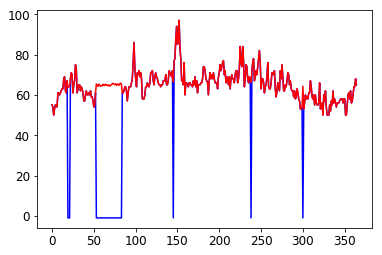

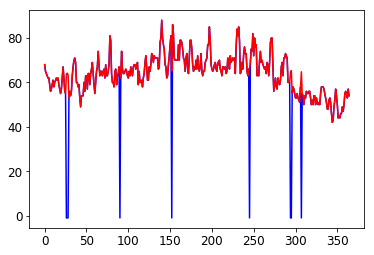

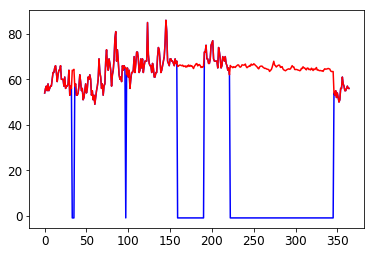

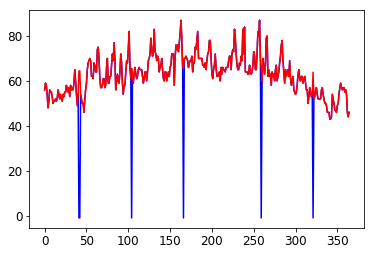

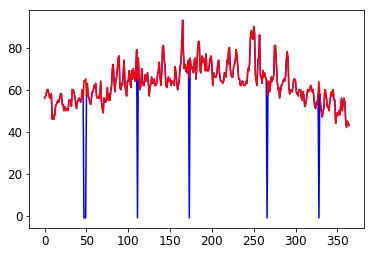

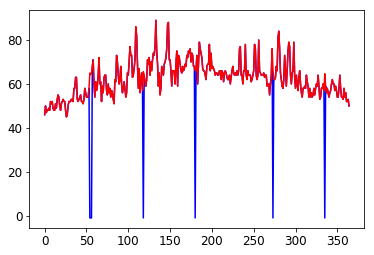

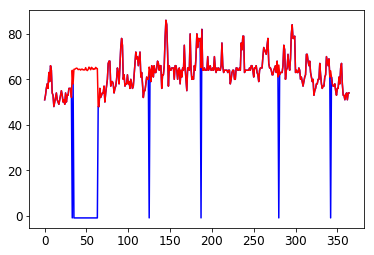

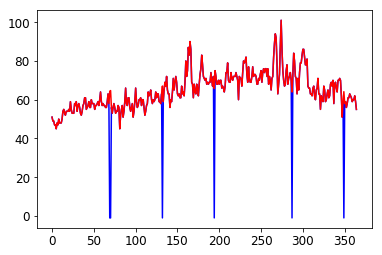

In [176]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False
   }
mpl.rcParams.update(params)

plt.figure()
plt.plot(dat_sm[1000:2000,0], 'g')
for i in range(0,10):
    plt.figure()
    plt.plot(dat_reshape[i,:,0], 'b-')
    plt.plot(dat_nz[i,:,0], 'r-')

In [209]:
n_days = dat_nz.shape[0]
dat_aug = []

def up_sample(x):
    """upsample each day into 52 examples (every 7 days)"""
    x_aug = []
    for j in range(104):
        x_aug.append(np.roll(x,-j*3, axis=0))
    return np.array(x_aug)
    
for i in range(n_days):
    dat_up = up_sample(dat_nz[i,:,:])
    dat_aug.append(dat_up)
dat_aug = np.concatenate(dat_aug, axis=0)
print(dat_aug.shape)

np.save('/home/qiyu/data/climate_s2s.npy',dat_aug[:,:,:18])
print(dat_aug[:,:,:18].shape)

(11856, 365, 54)
(11856, 365, 18)
